
![](https://hsto.org/files/256/a5d/ed0/256a5ded03274e0f87ccf97164c31c35.png)


# Регрессия - моя профессия


Задача, где надо спрогнозировать непрерывную переменную называется регрессией. Пример непрерывной переменной: цена на квартиры. Именно её прогнозированием мы сегодня и займёмся. Поехали!


## 1. Предобработка данных 

Начнём наш крестовый поход за дешёвой недвижимостью с предобработки данных. 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже знакомый вам пакет для картинок 
import seaborn as sns             # ещё один пакет для картинок 

%matplotlib inline

In [5]:
df = pd.read_csv('./task-3-boston_data.csv')  # подгружаем табличку 
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMM-ML-2023/data/flat.csv', sep='\t', index_col='n')  # подгружаем табличку 
print('Размер выборки:', df.shape)                          # смотрим на её размеры 
df.head( ) # Смотрим что лежит в табличке 

Размер выборки: (404, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


crim - уровень преступности на душу населения по городам

zn - доля земель под жилую застройку, зонированных под участки свыше 25 000 кв.м.

indus - доля акров неторгового бизнеса на город.

chas - фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)

nox - концентрация оксидов азота (частей на 10 млн)

rm - среднее количество комнат в жилом помещении

age - доля жилых единиц, построенных до 1940 г.

dis - взвешенные расстояния до пяти центров занятости Бостона.

rad - индекс доступности к радиальным магистралям

tax - полная ставка налога на имущество за 10 000 долларов США.

ptratio - соотношение учеников и учителей по городам

black - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.

lstat - % более низкий статус населения

medv - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [7]:
df.info() # посмотрим на информацию по типам переменных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [8]:
df.isnull().sum()  # посмотрим на то есть ли в переменных пропуски

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Пропусков нет. Это хорошая новость. А что делать, если бы они были? Вспоминайте, что мы делали в прошлый раз с Титаником! 

Посмотрим как выглядит распределение цен. 

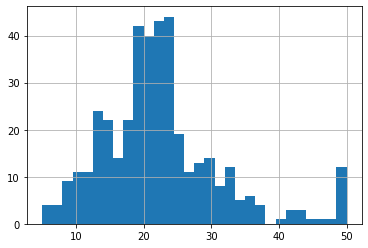

In [9]:
df.medv.hist(bins=30);

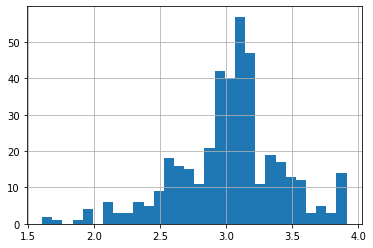

In [10]:
df['medv'] = np.log(df['medv'])
df.medv.hist(bins=30);

Посмотрим на рспределение всех остальных признаков. Давайте обсудим, что интересного видно на картинках!

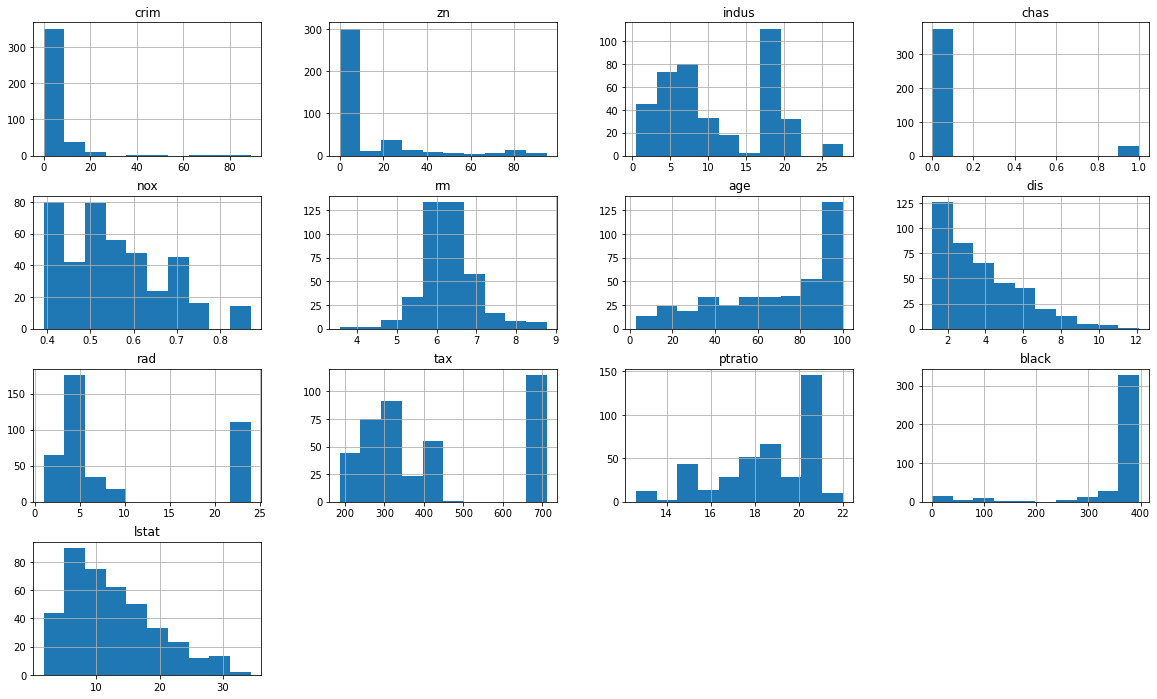

In [11]:
df.drop('medv',axis=1).hist(figsize=(20, 12));

Кроме гистограммок имеет смысл взглянуть на матрицу корреляций. Что видно на ней? 

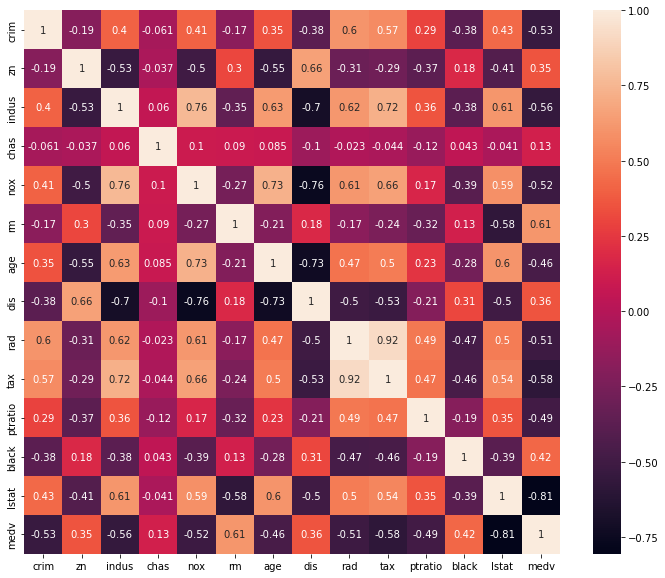

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

Ещё давайте посмотрим на облака рассеивания и успокоимся с картинками. 

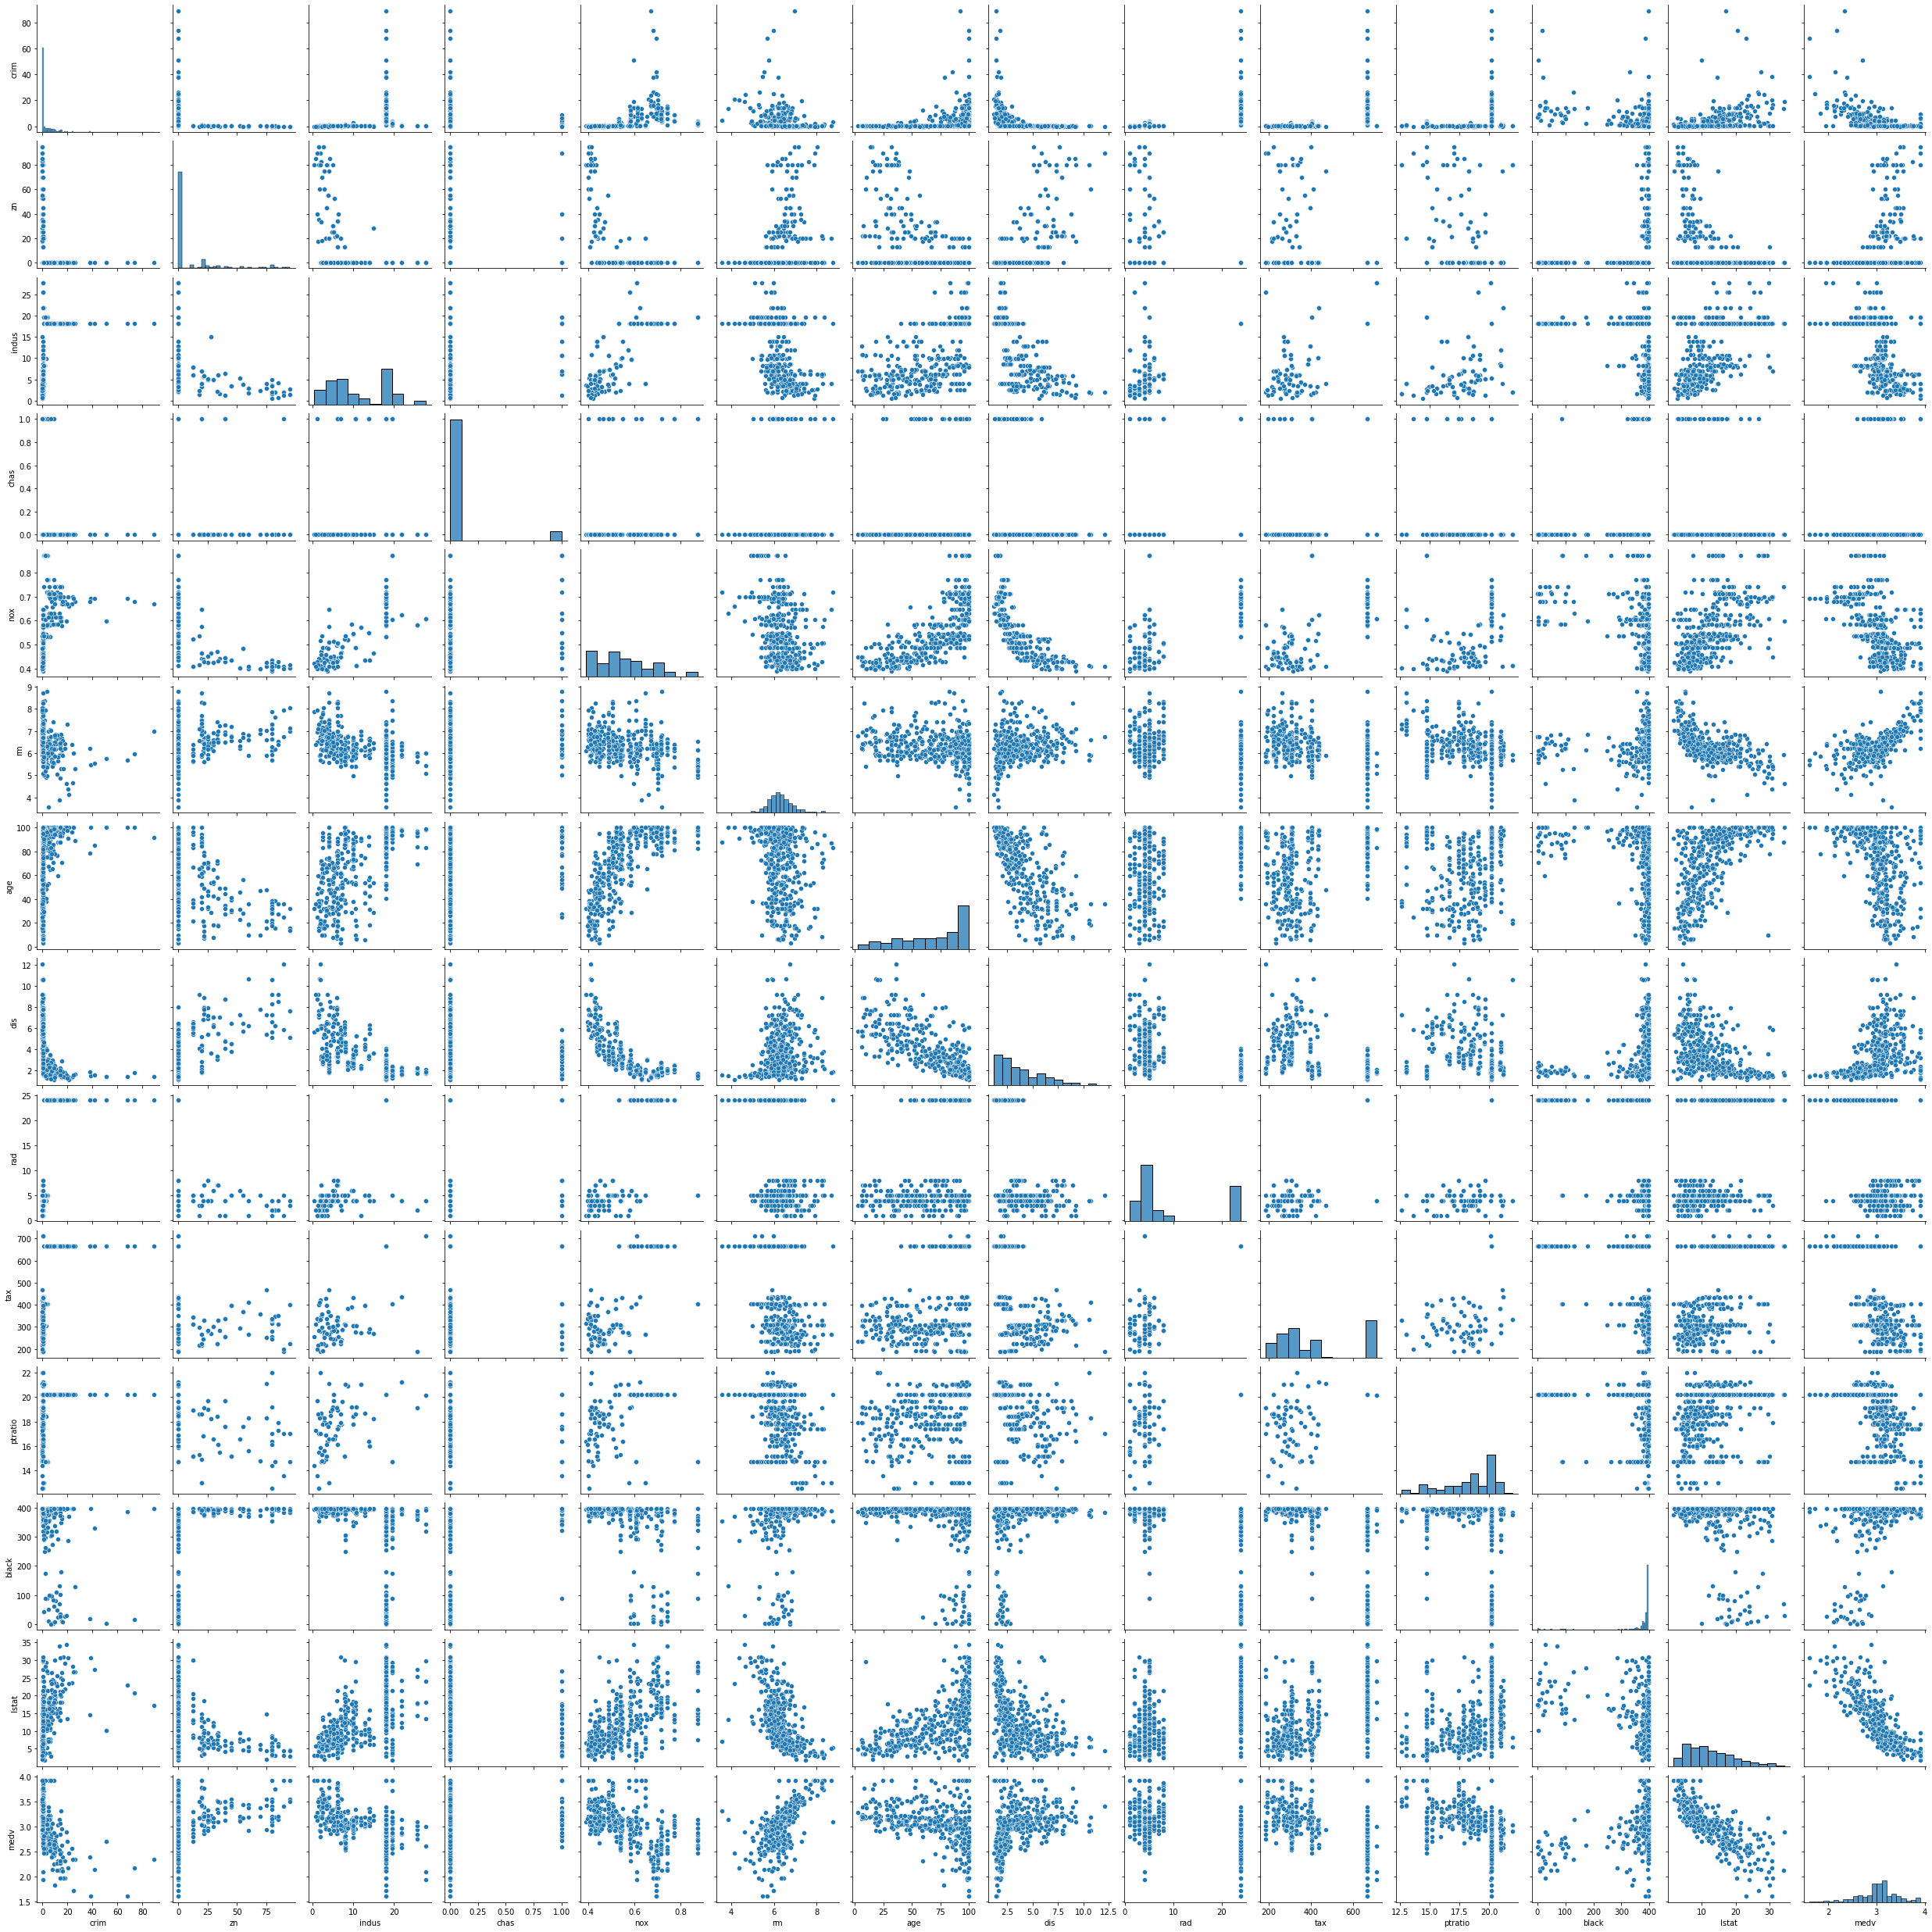

In [13]:
sns.pairplot(df)

Теперь распределение выглядит более приятно. 

Займёмся предобработкой категориальных переменных при помощи одного горячего кодирования (One Hot Encoding). При таком преобразовании категориальной переменной мы создаем столько новых столбцов, сколько различных значений этой переменной у нас было. Обычно, при этом, первый столбец убирается, чтобы не создавать линейно-зависимых столбцов. Например, если у переменной `"погода"` есть три состояния `"хорошая"`, `"средняя"` и `"нормальная"`, то после `OneHotEncoding` мы получим три столбца, где значения будут либо нулями, либо единицами, в зависимости от того, какая погода была в этом наблюдении.

## Важно
`OneHotEncoding` в общем случае тоже может привнести информацию о тестовой выборке в тренировочную в том случае, если в категориальном столбце в отложенной выборке могут содержаться новые значения. Если такая вероятность есть, то как и с другими методами препроцессинга, `OneHotEncoding` нужно обучать на трейне и использовать на тесте. 

В остальных случаях, можно воспользоваться удобной оберткой в `pandas` - `pd.get_dummies()`

Делим данные на тренировочные и тестовые! $30\%$ данных откладываем для тестирования качества модели. Остальные $70\%$ берём для обучения. 

In [15]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

Последний предобрабатывательский штрих это скалирование (стандартизация непрерывных переменных). Давайте вспомним зачем его делают. Обычно, когда обучают модель, хотят минимизировать ошибку, которую она допускает. Чаще всего эту функцию минимизируют численно. Если переменные измерены в разных шкалах (что-то в тоннах, что-то в годах и тд), алгоритм может при обучении заблудиться. Хорошо бы направить его и подтолкнуть в нужном направлении. Таким толчком является стандартизация переменных. 

Из каждой переменной вычетают среднее и делят на стандартное отклонение. Это очищает переменные от своих уникальных шкал и упрощает путь алгоритма к оптимальной точке. Обычно стандартное отклонение и среднее для скалирования оценивают на обучающей выборке. К тестовой применяют уже оценённый результат. Это позволяет не подглядывать в тестовую часть и не улучшать за счёт этого подглядывания прогнозы. Подглядывать - нечестно! 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_train)

StandardScaler()

In [17]:
df_train_scale = scaler.transform(df_train[['crim', 'zn', 'indus', 'chas', 'nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']])

df_test_scale = scaler.transform(df_test[['crim', 'zn', 'indus', 'chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']])

In [18]:
df_train[['crim', 'zn', 'indus', 'chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']] = df_train_scale
df_test[['crim', 'zn', 'indus', 'chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']] = df_test_scale

Все непрерывные переменные теперь выглядят проскалированными :) 

In [19]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
260,1.204125,-0.483468,1.013509,-0.268781,0.984482,0.405239,1.110440,-1.099273,1.686422,1.550267,0.842785,0.430721,1.327454,-1.593387
70,-0.381049,3.145466,-1.328188,-0.268781,-1.180168,-0.189196,-1.050328,1.112476,-0.857975,-0.354480,-1.740024,0.397620,-0.728336,0.427397
252,-0.373830,3.035499,-1.345675,-0.268781,-1.197079,-0.539960,-1.723120,3.121663,-0.626666,-0.438336,1.688068,0.210116,-1.008465,0.027746
331,-0.373357,-0.483468,2.418236,-0.268781,0.460231,-0.467013,0.555119,-0.824271,-0.626666,1.819806,0.795825,0.430721,0.163259,-0.034833
159,0.575788,-0.483468,1.013509,-0.268781,1.170507,0.186400,1.142477,-1.043500,1.686422,1.550267,0.842785,0.210856,1.211486,-1.327389


In [20]:
print(df_train.shape) # Посмотрим на размеры трэйна и теста 
print(df_test.shape)  

(282, 14)
(122, 14)


In [24]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 
y_train = df_train.medv
y_test = df_test.medv

X_train = df_train.drop('medv', axis=1)
X_test = df_test.drop('medv', axis=1)

## 2. Константный прогноз 

Шаг первый. Построим константный прогноз. Будем говорить, что стоимость любой квартиры равна среднему значению. Это самый глупый прогноз, который мы можем сделать. Мы будм сравнивать с ним прогнозы более сложных моделей. 

In [25]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([-5.76949343e-16, -5.76949343e-16, -5.76949343e-16, -5.76949343e-16,
       -5.76949343e-16])

## 3. Метрики качества для регрессии 

Мы сделали выше прогноз. Теперь мы хотим понять насколько он хороший. Для этого обычно используют метрики. Посмотрим на несколько таких метрик. 

In [26]:
from sklearn import metrics  # подгружаем метрики

Первой метрикой, с которой мы познакомимся, будет MAE (mean absolute error), средняя абсолютная ошибка. Она вычисляется следующим образом: 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$

Если мы спрогнозировали, что квартира стоит 20 рублей, а она стоила 10 рублей, мы ошиблись на |10 - 20| = 10 рублей. Средняя абсолютная ошибка - это средняя сумма рублей, на которую мы облажались. 

In [28]:
metrics.mean_absolute_error(y_test, y_pred_naive)

0.8387507308596259

Напомню, что мы прогнозируем логарифм цены, нам так удобнее. Ошибка выше считается в логарифмах. Если мы хотим посмотреть на ошибку в долларах, надо взять экспоненту от цен. Ниже мы можем увидеть, что в среднем ошибаемся на тридцать с лишним тысяч долларов. 

In [29]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

1.3749354239233902

Второй метрикой является MSE (mean squared error), средняя квадратичная ошибка. Она вычисляется как 

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

Смысл этой ошибки в том, чтобы штрафовать за большие ошибки сильнее, чем за маленькие. Если мы ошиблись на 5 долларов, то в ошибку войдёт 25. Если мы ошиблись на 10 долларов, то в ошибку войдёт 100. Чем выше ошибка, тем сильнее штраф. 

In [30]:
metrics.mean_squared_error(y_test, y_pred_naive)

1.1818617202414383

По аналогии перейдём к долларам. 

In [31]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

6.627716894621454

Получилось многовато, не находите? Всё дело в том, что это не просто доллары, это квадратные доллары. Мы же суммировали квадраты. Неплохо было бы вернутся к обычным долларам. Для этого надо взять из MSE квадратный корень. Тогда получится новая ошибка, RMSE. 

In [32]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

2.5744352574150033

Ошибка в среднем более чем на 60 тысяч долларов. Так как более большие ошибки входят с более большим весом, вполне логично, что RMSE получилось больше, чем MAE. 

Часто для нас принципиальным является не то, на сколько денег мы ошиблись, а то на сколько процентов мы ошиблись. Метрика, которая отлавливает процентную ошибку, называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. 

$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$

Она часто применяется в следующих задачах: например, вы прогнозируете спрос, и вам принципиально, на сколько процентов вы ошиблись, а не абсолютное значение. Если вы предсказали  один, а в реальности было  десять - это не то же самое, что вы предсказали  тысяча, а в реальности было  тысяча  девять. С точки зрения МАЕ или MSE, это две совершенно одинаковые ошибки. А если вас интересует, сколько в среднем на сколько процентов вы ошибаетесь, то это отражает МАРЕ.

Её нам придётся реальзовать самостоятельно. Благо, это не очень трудно. 

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)


100.00000000000043

Средняя ошибка примерно на $5\%$ от цены. 

Последняя метрика, с которой нам нужно познакомиться, это коэффициент детерминации, $R^2$. Он отражает то, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели:

$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$

Эту метрику очень сильно любят консалтеры и аудиторы, потому что только её они и знают. На самом деле в ней нет ничего хорошего. При добавлении в модель новых переменных она всегда растёт. У неё есть ещё несколько тонких математических недостатков, о которых вы можете узнать из книг. 

In [36]:
metrics.r2_score(y_test, y_pred_naive)

-0.010876346079925714

Закинем все метрики в одну общую функцию, чтобы было удобно их печатать. 

In [37]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [39]:
print_metrics(y_test, y_pred_naive)

MAE: 1.3749354239233902
RMSE: 2.5744352574150033
R2: -0.010876346079925714
MAPE: 100.00000000000043


## 3. Строим нашу первую регрессию!

Пришло время построить линейную регрессию! Эта модель говорит, что цена на квартиру формируется в результате суммирования тех характеристик, которыми она обладает с какими-то весами

$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$

Например, если мы оценили модель и у нас получилось, что 

$$ price = 10000 + 20 \cdot totsp,$$

то это означает, что средняя стоимость квартиры равна 10 тыс. долларам. При этом каждый дополнительный метр общей площади квартиры делает её дороже на 20 рублей. 

Для того, чтобы обучить регрессию минимизируют одну из метрик, перечисленных в прошлом разделе. В базовой комплектации регрессии это делают с MSE. Такая модель обладает огромным количеством няшных статистических свойств. 

In [40]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)


Посмотрим на качество прогнозов. Мы стали ошибаться меньше, чем раньше. 

In [41]:
print_metrics(y_test,y_pred_regr)

MAE: 0.6659471754820027
RMSE: 1.4166400440138738
R2: 0.7887832983627836
MAPE: 296.9547241592436


Посмотрим на то, какие признаки вносят в цену наибольший вклад. 

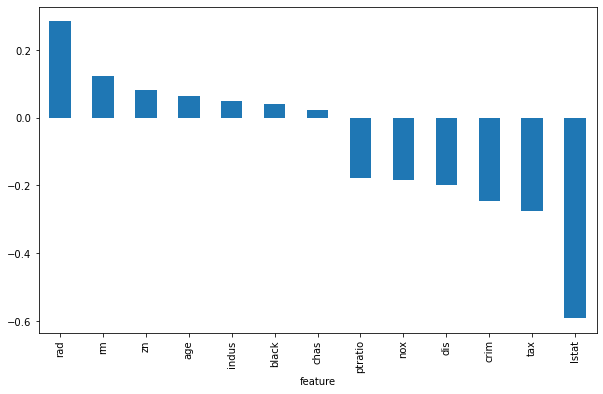

In [43]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(10, 6));

## 4. Строим Lasso-регрессию 

Построим более сложную модель, LASSO-регрейссию. Фишка этой модели в том, что она зануляет лишние коэффиценты. 

In [44]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(X_test)

Посмотрим на важность факторов для стоимости квартиры. 

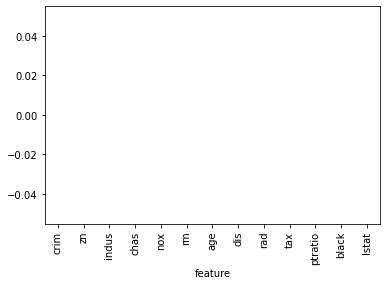

In [46]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

In [47]:
print_metrics(y_test,y_pred_lasso)

MAE: 1.3749354239233902
RMSE: 2.5744352574150033
R2: -0.010876346079925714
MAPE: 100.00000000000044


Важных факторов нет, всё занулилось. Метрики качества такие же, как при константном прогнозе. Почему такое произошло? Дело в том, что у модели есть гиперпараметр - сила зануления. И его нужно подбирать методом перебора. В нашей модели он стоял слишком большим. Давайте попробуем подобрать этот параметр. 

## 5. Подбор гиперпараметра для Lasso-регрессии

Будем делать перебор следующим способом: дробим тренировочную выборку на пять частей. На четырёх учим модель, на пятой прогнозируем. Смотрим на качество. И так по очереди выделяем для прогноза каждую из 5 частичек. Потом качество прогноза усредняем - кросс-валидация. Для какого параметра из решётки качетство получится наибольшим, тот мы и оставим. 

In [48]:
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


При параметре 0.001 качество у прогнозов получилось самым хорошим. Его и берём. Посмотрим на важность переменных

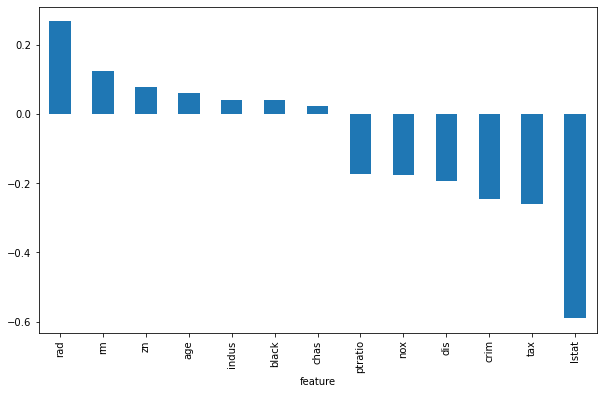

In [49]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(10, 6));

И на качество модели. Оно оказывается близким к обычной регрессии. Судя по всему у нас в выборке нет лишних переменных и занулять нечего. 

In [50]:
print_metrics(y_test,y_pred_lasso)

MAE: 0.6679864220300727
RMSE: 1.4236568635402036
R2: 0.7882191167515535
MAPE: 294.5569604691659


In [51]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred_lasso_cv = lasso_cv.predict(X_test)

Лучшее значение параметра: 0.0008187826606346477


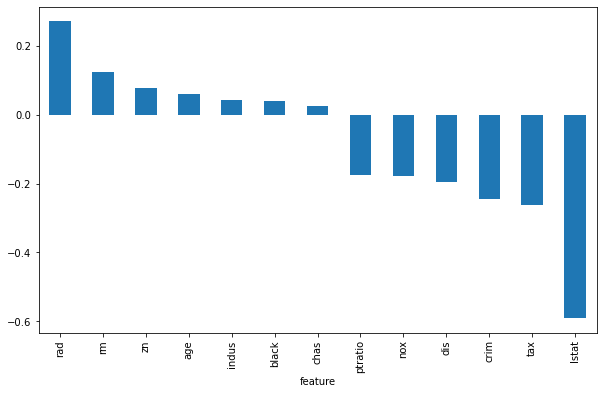

In [52]:
featureImportance = pd.DataFrame({"feature": df.drop('medv',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(10, 6));

In [53]:
print_metrics(y_test, y_pred_lasso_cv)

MAE: 0.6675542621697326
RMSE: 1.42238348630303
R2: 0.7883266260626829
MAPE: 294.9835520474829
